In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [91]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [92]:
data.drop(data.columns[10:30], axis=1, inplace=True)

In [93]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [94]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [95]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data["size_category"])

<AxesSubplot:xlabel='size_category', ylabel='Density'>

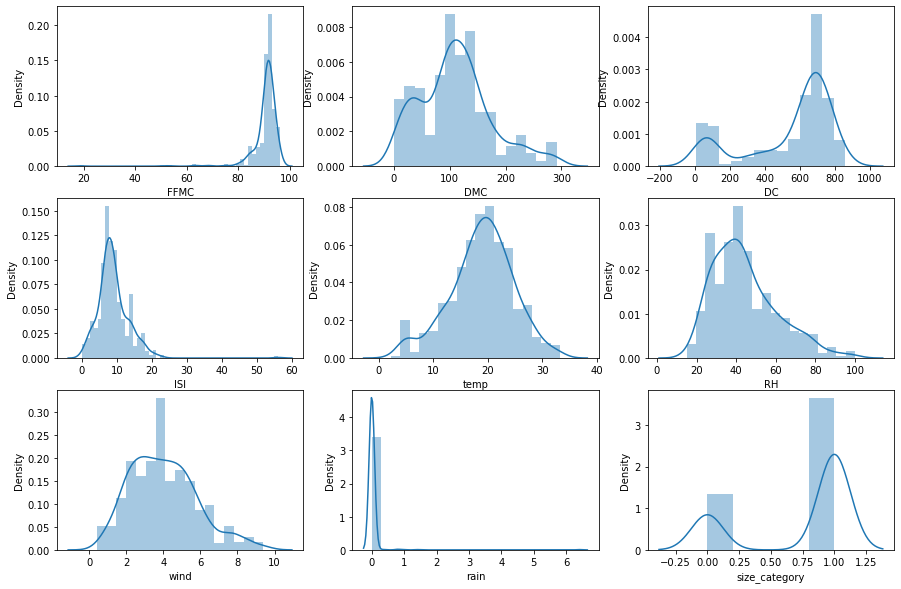

In [96]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.distplot(data.FFMC, ax=ax[0,0])
sns.distplot(data.DMC, ax=ax[0,1])
sns.distplot(data.DC, ax=ax[0,2])
sns.distplot(data.ISI, ax=ax[1,0])
sns.distplot(data.temp, ax=ax[1,1])
sns.distplot(data.RH, ax=ax[1,2])
sns.distplot(data.wind, ax=ax[2,0])
sns.distplot(data.rain, ax=ax[2,1])
sns.distplot(data.size_category, ax=ax[2,2])

In [97]:
seq={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
data=data.replace(seq)

seq1={'day':{'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}}
data=data.replace(seq1)

In [98]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


# Model Building

In [99]:
seed=7
np.random.seed(seed)
x=data.iloc[:,:10].values
y=data.iloc[:,10].values

In [100]:
x

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [101]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
x= std.fit_transform(x)
x.shape

(517, 10)

In [102]:
model=Sequential()
model.add(Dense(11, input_dim=10 , activation='sigmoid'))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [103]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [104]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                121       
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 dense_17 (Dense)            (None, 1)                 12        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [105]:
history=model.fit(x,y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
35/35 [==============================] - 6s 57ms/step - loss: 1.0173 - accuracy: 0.2428 - val_loss: 0.8759 - val_accuracy: 0.3216
Epoch 2/100
35/35 [==============================] - 1s 20ms/step - loss: 0.8502 - accuracy: 0.2428 - val_loss: 0.7675 - val_accuracy: 0.3216
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.7390 - accuracy: 0.2572 - val_loss: 0.6997 - val_accuracy: 0.4152
Epoch 4/100
35/35 [==============================] - 1s 20ms/step - loss: 0.6668 - accuracy: 0.7052 - val_loss: 0.6633 - val_accuracy: 0.6784
Epoch 5/100
35/35 [==============================] - 1s 23ms/step - loss: 0.6229 - accuracy: 0.7572 - val_loss: 0.6441 - val_accuracy: 0.6784
Epoch 6/100
35/35 [==============================] - 1s 18ms/step - loss: 0.5955 - accuracy: 0.7572 - val_loss: 0.6349 - val_accuracy: 0.6784
Epoch 7/100
35/35 [==============================] - 1s 20ms/step - loss: 0.5796 - accuracy: 0.7572 - val_loss: 0.6310 - val_accuracy: 0.6784
Epoch 

In [109]:
768*0.67

514.5600000000001

# model evaluation

In [106]:
scores=model.evaluate(x,y)
print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 7ms/step - loss: 0.5729 - accuracy: 0.7427
accuracy:74.27%


In [107]:
history = model.fit(x,y, validation_split=0.33, epochs=100, batch_size=10)


Epoch 1/100
35/35 [==============================] - 1s 26ms/step - loss: 0.5302 - accuracy: 0.7803 - val_loss: 0.6593 - val_accuracy: 0.6784
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 0.5301 - accuracy: 0.7746 - val_loss: 0.6610 - val_accuracy: 0.6784
Epoch 3/100
35/35 [==============================] - 1s 18ms/step - loss: 0.5294 - accuracy: 0.7803 - val_loss: 0.6606 - val_accuracy: 0.6784
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 0.5296 - accuracy: 0.7803 - val_loss: 0.6598 - val_accuracy: 0.6784
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 0.5292 - accuracy: 0.7803 - val_loss: 0.6614 - val_accuracy: 0.6784
Epoch 6/100
35/35 [==============================] - 1s 18ms/step - loss: 0.5289 - accuracy: 0.7803 - val_loss: 0.6633 - val_accuracy: 0.6784
Epoch 7/100
35/35 [==============================] - 1s 20ms/step - loss: 0.5285 - accuracy: 0.7803 - val_loss: 0.6609 - val_accuracy: 0.6784
Epoch 

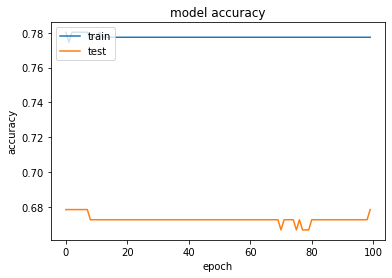

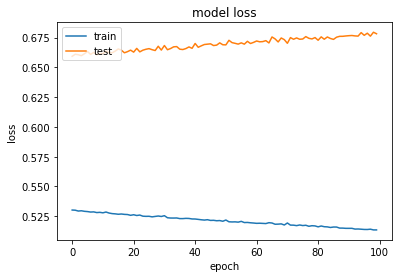

In [108]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [113]:
def create_model():
    model=Sequential()
    model.add(Dense(11, input_dim=10 , activation='sigmoid'))
    model.add(Dense(11, activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model
    

In [121]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   9.2s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.750 total time=  11.3s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.524 total time=   7.8s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.680 total time=  10.9s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.699 total time=   8.2s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.583 total time=   5.6s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   8.3s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.750 total time=   8.6s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.524 total time=  52.7s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.680 total time=  11.6s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.699 total time=   8.8s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................
[CV 1/5; 11/12] END ..batch_

In [125]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.7305825233459473,using{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 50}
0.7228155255317688,0.15670215956655625with:{'batch_size': 10, 'epochs': 100}
0.713125467300415,0.15712561193762414with:{'batch_size': 10, 'epochs': 150}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 50}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 100}
0.7150672078132629,0.15603578726289602with:{'batch_size': 20, 'epochs': 150}
0.7072815537452698,0.16572960214278068with:{'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 100}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 150}


In [126]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    activation_function=["softmax","relu","tanh","linear"]
    init=["uniform","normal","zero"]
    
    param_grid=dict(activation_function=activtion_function,init=init)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   7.9s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.750 total time=   7.7s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.524 total time=   7.5s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.680 total time=   9.0s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.699 total time=   7.7s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 1/5; 11/12] END ..batch_size=40, epochs=100;, score=1.000 total time=  12.5s
[CV 2/5; 11/12] START batch_size=40, epochs=100.................................
[CV 2/5; 11/12] END ..batch_size=40, epochs=100;, score=0.750 total time=  13.2s
[CV 3/5; 11/12] START batch_size=40, epochs=100.................................
[CV 3/5; 11/12] END ..batch_size=40, epochs=100;, score=0.524 total time=  14.8s
[CV 4/5; 11/12] START batch_size=40, epochs=100.................................
[CV 4/5; 11/12] END ..batch_size=40, epochs=100;, score=0.680 total time=  13.2s
[CV 5/5; 11/12] START batch_size=40, epochs=100.................................
[CV 5/5; 11/12] END ..batch_size=40, epochs=100;, score=0.699 total time=  53.3s
[CV 1/5; 12/12] START batch_size=40, epochs=150.................................
[CV 1/5; 12/12] END ..batch_size=40, epochs=150;, score=1.000 total time=  15.8s
[CV 2/5; 12/12] START batch_size=40, epochs=150.................................
[CV 2/5; 12/12] END ..batch_

In [127]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.7305825233459473,using{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 50}
0.7228155255317688,0.15670215956655625with:{'batch_size': 10, 'epochs': 100}
0.7111837148666382,0.15830323486778416with:{'batch_size': 10, 'epochs': 150}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 50}
0.7286407709121704,0.1547957721980402with:{'batch_size': 20, 'epochs': 100}
0.7228155255317688,0.15670215956655625with:{'batch_size': 20, 'epochs': 150}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 100}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 150}


In [128]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.2))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    neuron1=[4,8,16]
    neuron2=[2,4,8]
    
    param_grid=dic1t(neuron1=neuron1,neuron2=neuron2)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
    grid_result=grid.fit(x,y)

In [129]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.7305825233459473,using{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 10, 'epochs': 50}
0.7228155255317688,0.15670215956655625with:{'batch_size': 10, 'epochs': 100}
0.7111837148666382,0.15830323486778416with:{'batch_size': 10, 'epochs': 150}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 20, 'epochs': 50}
0.7286407709121704,0.1547957721980402with:{'batch_size': 20, 'epochs': 100}
0.7228155255317688,0.15670215956655625with:{'batch_size': 20, 'epochs': 150}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 100}
0.7305825233459473,0.15435061319000673with:{'batch_size': 40, 'epochs': 150}


In [130]:
def create_model():
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.1))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.001)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    model.fit(x,y)
    y_predict=model.predict(x)
    
    print(accuracy_score(y,y_predict))
   

In [134]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(droupout_rate))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0)
    
    batch_size=[10,20,40]
    epochs=[10,50,100]
    learning_rate=[0.001,0.01,0.1]
    dropout_rate=[0.0,0.1,0.2]
    activation_function=["softmax","relu","tanh","linear"]
    init=["uniform","normal","zero"]
    neuron1=[4,8,16]
    neuron2=[2,4,8]
    
    
    param_grid=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,
                     activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
    grid_result=grid.fit(x,y)
    
    
    print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
    means=grid_result.cv_results_["mean_test_score"]
    stds=grid_result.cv_results_["std_test_score"]
    params=grid_result.cv_results_["params"]
    for mean,stdev,param in zip(means,stds,params):
        print("{},{}with:{}".format(mean,stdev,param))